In [26]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn import metrics

import cv2
import os
import random
import matplotlib.image as mpimg

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import tensorflow as tf

from keras.initializers import RandomNormal
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping

## Load Data

In [49]:
img_folder = r"C:/Users/chach/OneDrive - HEC Paris/M2- Courses/16- Quantum Black/Quantum-Black-Challenge/data/ai_ready/images/"
img0 = "C:/Users/chach/OneDrive - HEC Paris/M2- Courses/16- Quantum Black/Quantum-Black-Challenge/data/ai_ready/images0/"
img1 = "C:/Users/chach/OneDrive - HEC Paris/M2- Courses/16- Quantum Black/Quantum-Black-Challenge/data/ai_ready/images1/"
labels_image = pd.read_csv("C:/Users/chach/OneDrive - HEC Paris/M2- Courses/16- Quantum Black/Quantum-Black-Challenge/data/ai_ready/x-ai_data.csv")

### Create Subfolders for Images Labeled 1 and 0

In [60]:
df0 = labels_image.loc[labels_image['class']==0]
df1 = labels_image.loc[labels_image['class']==1]

In [62]:
#Move images labeled 0 to the correct folder
for i in df0.index:
    im = cv2.imread(img_folder+df0.loc[i,'filename'])
    cv2.imwrite(img0 +df0.loc[i,'filename'], im)

In [63]:
#Move images labeled 1 to the correct folder
for i in df1.index:
    im = cv2.imread(img_folder+df1.loc[i,'filename'])
    cv2.imwrite(img1 +df1.loc[i,'filename'], im)

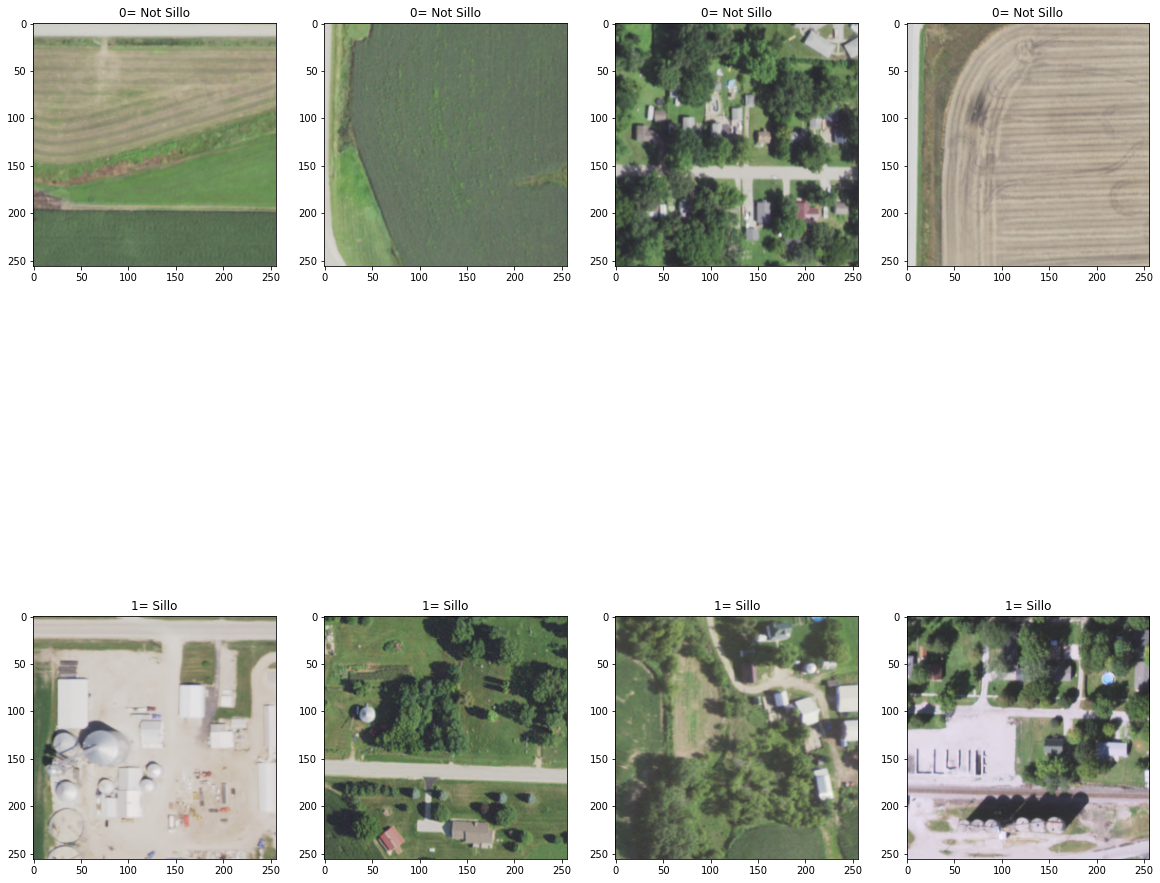

In [79]:
#printing random five images
plt.figure(figsize=(20,20))

for i in range(8):
    if i < 4:
        files0 = random.choice(os.listdir(img0))
        image_path = os.path.join(img_folder, files0)
        title = "0= Not Sillo"
    else:
        files1 = random.choice(os.listdir(img1))
        image_path = os.path.join(img_folder, files1)
        title = "1= Sillo"
    img=mpimg.imread(image_path)
    ax=plt.subplot(2, 4,i+1)
    ax.title.set_text(title)
    plt.imshow(img)